In [42]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# Load the dataset
crop = pd.read_csv("Crop_recommendation.csv")

In [44]:
crop.shape

(2200, 8)

In [45]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [46]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


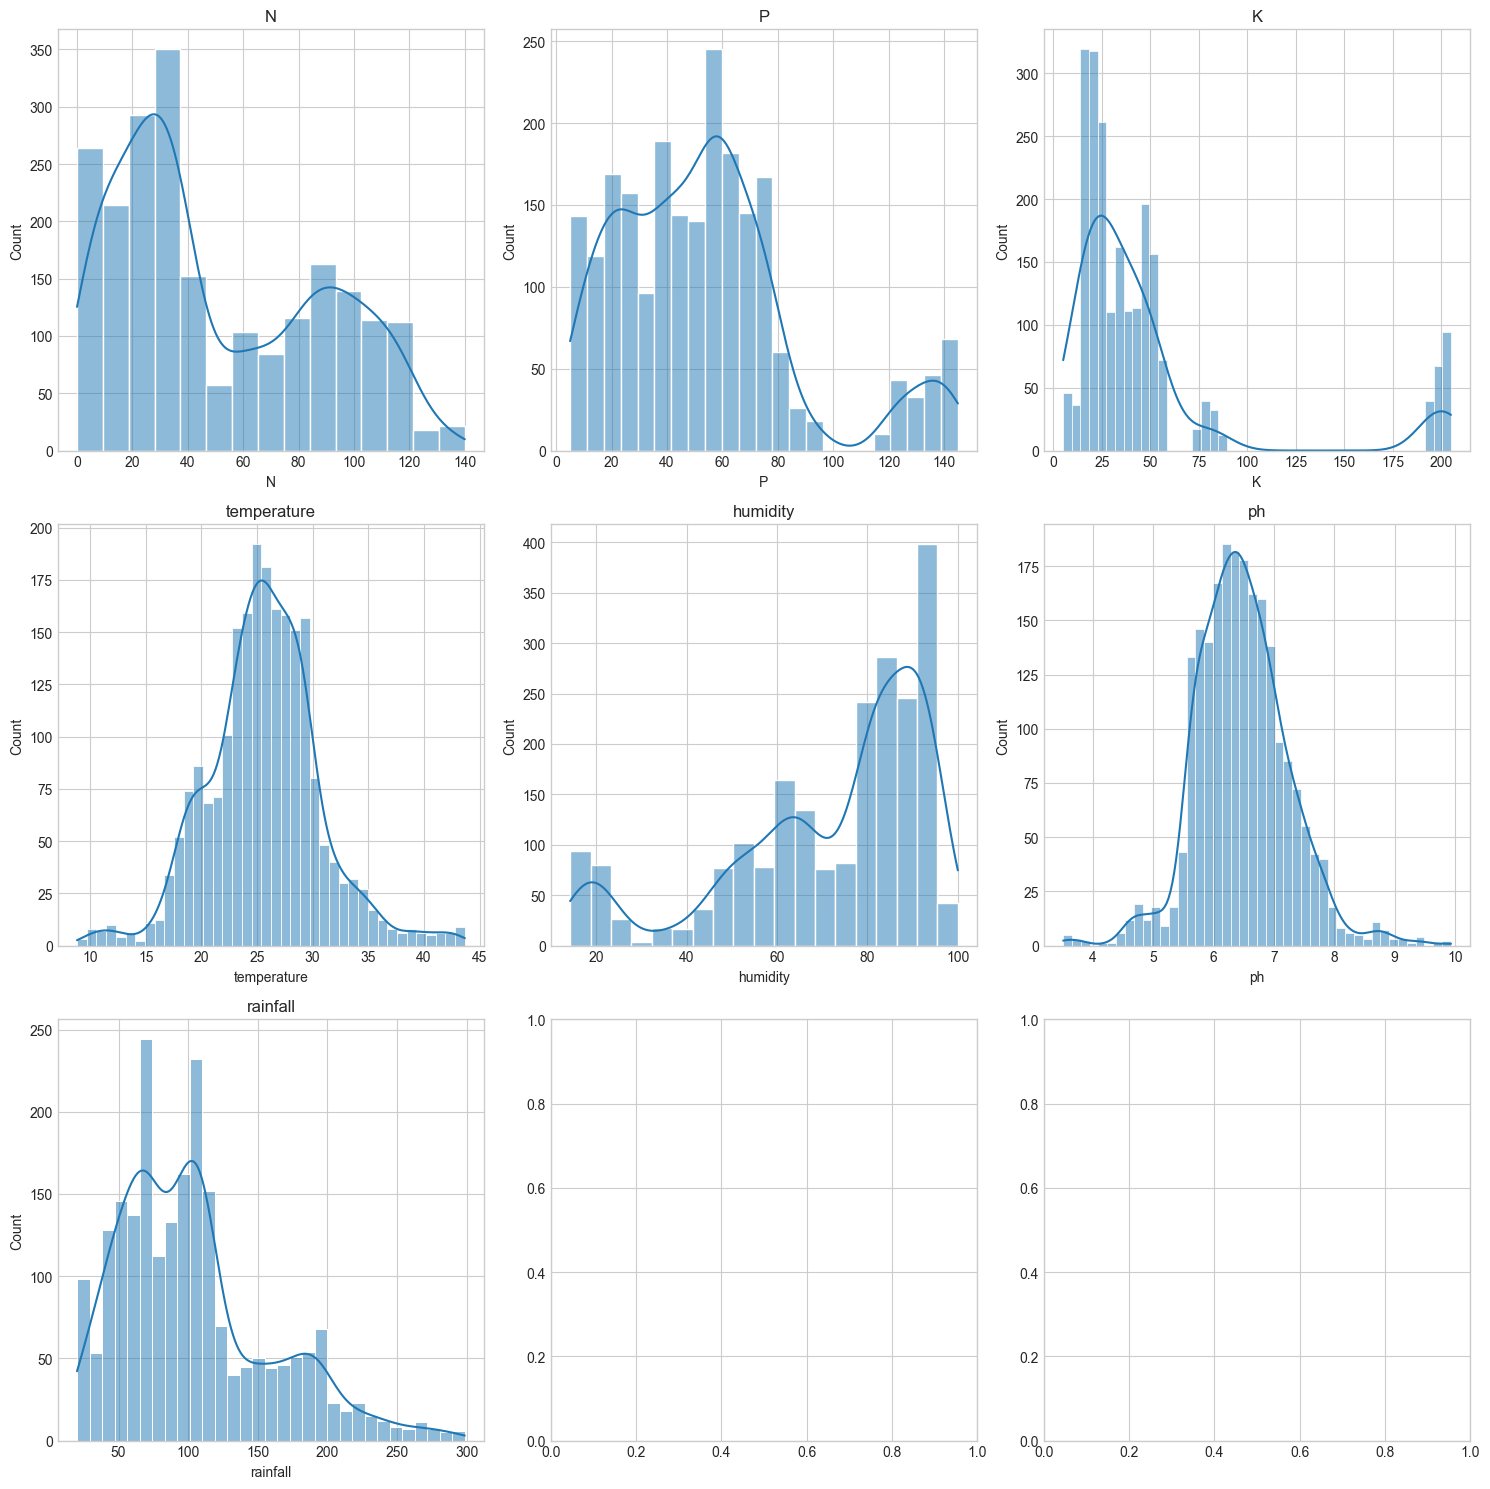

In [47]:
# Visualize the distribution of each feature
import seaborn as sns
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']  # Add this line
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i, subplot in zip(features, ax.flatten()):
    sns.histplot(crop[i], ax=subplot, kde=True)
    subplot.set_title(i)
plt.tight_layout()
plt.show()

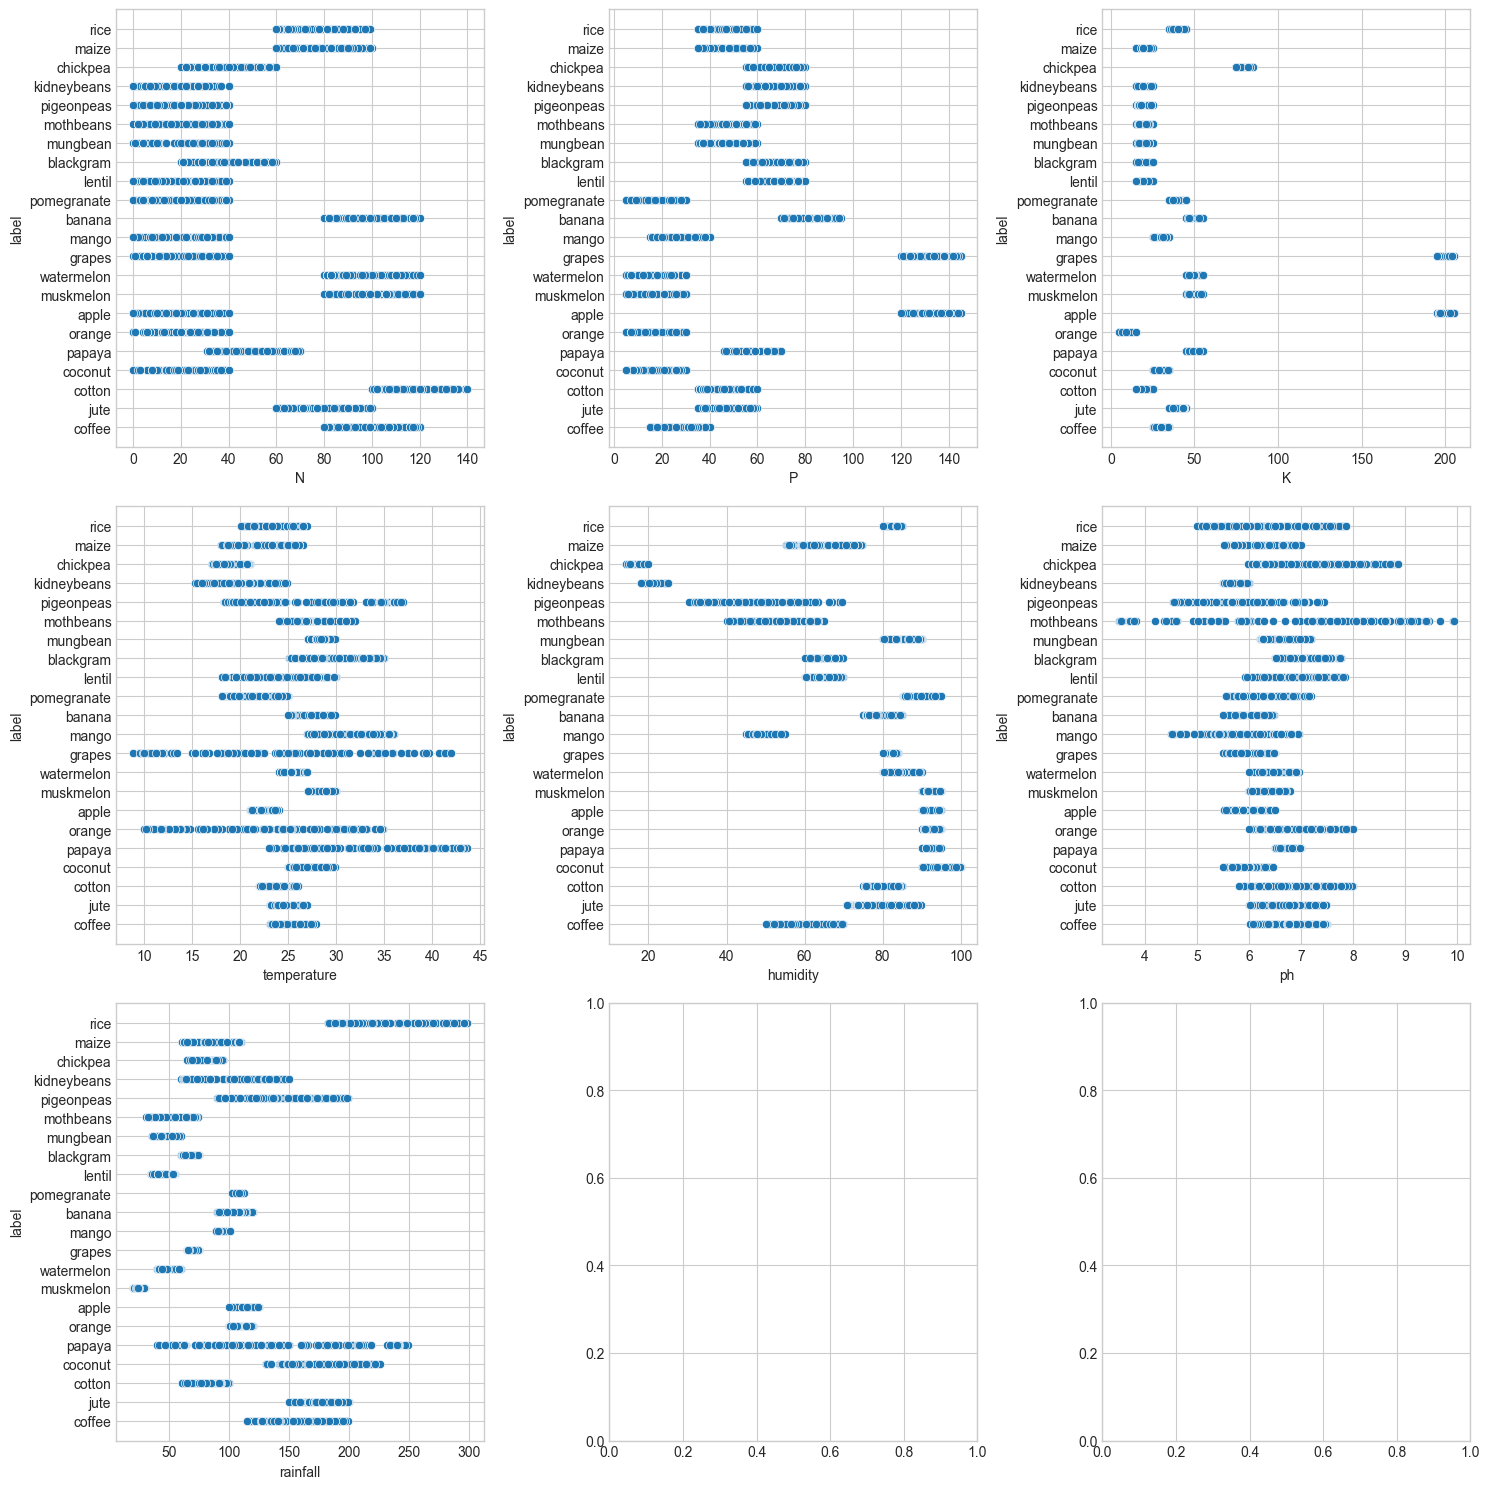

In [48]:
#Ploting scatter plot
import seaborn as sns
fig,ax=plt.subplots(3,3,figsize=(15,15))
for i,subplot in zip(features,ax.flatten()):
    sns.scatterplot (x=i,y='label',data=crop,ax=subplot)
plt.tight_layout()
plt.show()

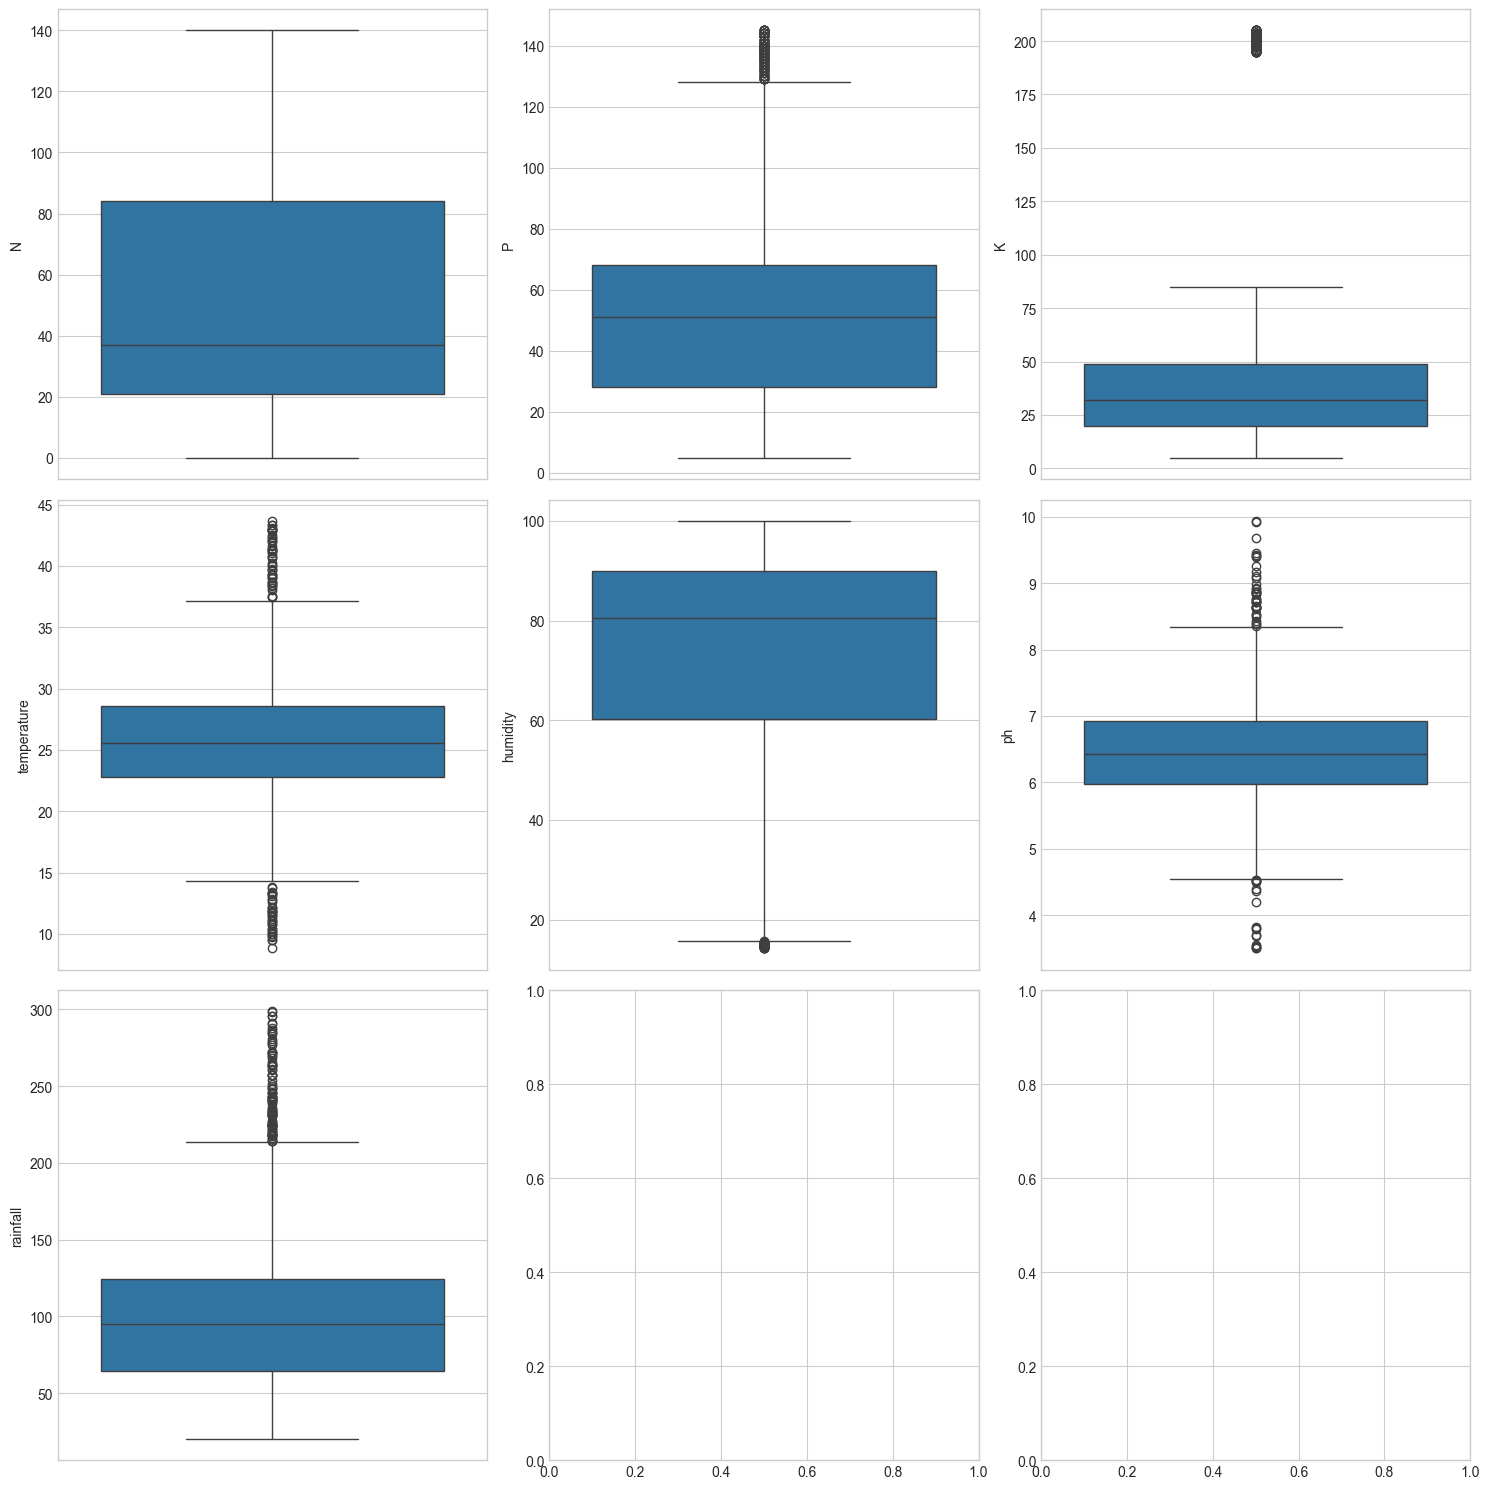

In [49]:
#Finding outlires -boxplot
fig,ax=plt.subplots(3,3,figsize=(15,15))
for i,subplot in zip(features, ax.flatten()):
    sns.boxplot(crop[i],ax=subplot)
plt.tight_layout()
plt.show()

In [50]:
#Correlation of the features
num_cols=crop.select_dtypes(include=[np.number])
num_cols

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [51]:
corr=num_cols.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


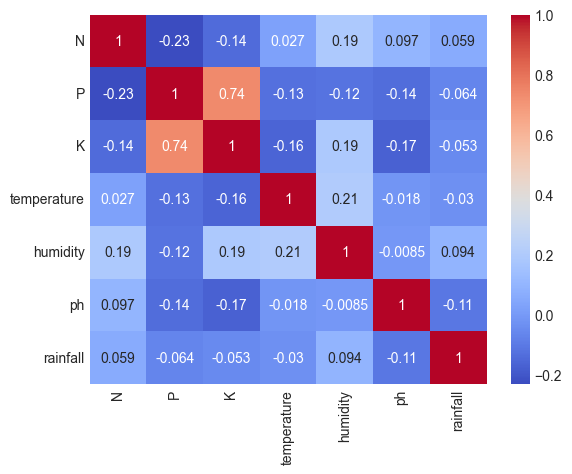

In [52]:
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

In [53]:

crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [54]:
crop_dict={
    'rice':0,
    'maize':1,
    'chickpea':2,
    'kidneybeans':3,
    'pigeonpeas':4,
    'mothbeans':5,
    'mungbean':6,
    'blackgram':7,
    'lentil':8,
    'pomegranate':9,
    'banana':10,
    'mango':11,
    'grapes':12,
    'watermelon':13,
    'muskmelon':14,
    'apple':15,
    'orange':16,
    'papaya':17,
    'coconut':18,
    'cotton':19,
    'jute':20,
    'coffee':21,
}

In [55]:
crop.drop('label',axis=1,inplace=True)
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293
2199,104,18,30,23.603016,60.396475,6.779833,140.937041


In [56]:
# Reload the dataset to restore the 'label' column
crop = pd.read_csv("Crop_recommendation.csv")

from sklearn.model_selection import train_test_split
X = crop.drop('label', axis=1)
y = crop['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
X_train.shape
X_test.shape

(440, 7)

In [58]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [59]:

#Training the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [60]:

dtc=DecisionTreeClassifier()
dtc.fit(X_train_scaled,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [61]:

from sklearn.metrics import accuracy_score
y_pred=dtc.predict(X_test_scaled)
acs=accuracy_score(y_test,y_pred)
print('Acurracy Score',acs)

Acurracy Score 0.9886363636363636


In [62]:
#Prediction
import numpy as np
def crop_rec(N,P,K,temp,hum,ph,rain):
    features=np.array([[N,P,K,temp,hum,ph,rain]])
    transformed_features=scaler.transform(features)
    prediction=dtc.predict(transformed_features).reshape(1,-1)
    crop_dict={
                0:'rice',
                1:'maize',
                2:'chickpea',
                3:'kidneybeans',
                4:'pigeonpeas',
                5:'mothbeans',
                6:'mungbean',
                7:'blackgram',
                8:'lentil',
                9:'pomegranate',
                10:'banana',
                11:'mango',
                12:'grapes',
                13:'watermelon',
                14:'muskmelon',
                15:'apple',
                16:'orange',
                17:'papaya',
                18:'coconut',
                19:'cotton',
                20:'jute',
                21:'coffee',
            }
    crop=[crop_dict[i] for i in prediction[0]]
    return f"{crop} is a best to grow in the farm" 

In [63]:
def crop_rec(N, P, K, temp, hum, ph, rain):
    features = np.array([[N, P, K, temp, hum, ph, rain]])
    transformed_features = scaler.transform(features)
    prediction = dtc.predict(transformed_features)
    return f"{prediction[0]} is best to grow in the farm"

In [64]:
# Example input values
N = 60
P = 32
K = 33
temp = 22.5
hum = 77
ph = 5.5
rain = 250

# Get crop recommendation
result = crop_rec(N, P, K, temp, hum, ph, rain)
print(result)

coconut is best to grow in the farm


c:\Users\nisha\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [65]:

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
# Train the model on the SCALED data
rf.fit(X_train_scaled, y_train)

# Test the model on the SCALED data
rf_score = rf.score(X_test_scaled, y_test)
print(f"Random Forest accuracy: {rf_score:.2f}")

Random Forest accuracy: 0.99


In [66]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
dtc = DecisionTreeClassifier(random_state=42)

# Train the model on the SCALED data
dtc.fit(X_train_scaled, y_train)

# Test the model on the SCALED data
dtc_score = dtc.score(X_test_scaled, y_test)
print(f"Decision Tree accuracy: {dtc_score:.2f}")

Decision Tree accuracy: 0.99


In [67]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
svm_score = svm.score(X_test, y_test)
print(f"SVM accuracy: {svm_score:.2f}")


SVM accuracy: 0.96


In [68]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_score = knn.score(X_test, y_test)
print(f"KNN accuracy: {knn_score:.2f}")


KNN accuracy: 0.97


In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the Random Forest model on SCALED data
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

# Make predictions on the SCALED test data
y_pred_rf = rf.predict(X_test_scaled)

# Generate and print the report
print("--- Random Forest Classification Report ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}\n")
print(classification_report(y_test, y_pred_rf))

--- Random Forest Classification Report ---
Accuracy: 0.9931818181818182

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      o

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the KNN model on SCALED data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Make predictions on the SCALED test data
y_pred_knn = knn.predict(X_test_scaled)

# Generate and print the report
print("--- K-Nearest Neighbors (KNN) Classification Report ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)}\n")
print(classification_report(y_test, y_pred_knn))

--- K-Nearest Neighbors (KNN) Classification Report ---
Accuracy: 0.9568181818181818

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      0.95      0.95        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.89      1.00      0.94        17
      grapes       1.00      1.00      1.00        14
        jute       0.81      0.96      0.88        23
 kidneybeans       0.91      1.00      0.95        20
      lentil       0.69      1.00      0.81        11
       maize       1.00      0.90      0.95        21
       mango       0.90      1.00      0.95        19
   mothbeans       1.00      0.83      0.91        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00      

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the Decision Tree model on SCALED data
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train_scaled, y_train)

# Make predictions on the SCALED test data
y_pred_dtc = dtc.predict(X_test_scaled)

# Generate and print the report
print("--- Decision Tree Classification Report ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dtc)}\n")
print(classification_report(y_test, y_pred_dtc))

--- Decision Tree Classification Report ---
Accuracy: 0.9863636363636363

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       0.96      1.00      0.98        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      0.96      0.94        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      o

In [74]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the SVM model on SCALED data
svm = SVC()
svm.fit(X_train_scaled, y_train)

# Make predictions on the SCALED test data
y_pred_svm = svm.predict(X_test_scaled)

# Generate and print the report
print("--- Support Vector Machine (SVM) Classification Report ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}\n")
print(classification_report(y_test, y_pred_svm))

--- Support Vector Machine (SVM) Classification Report ---
Accuracy: 0.9681818181818181

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.78      0.91      0.84        23
 kidneybeans       0.91      1.00      0.95        20
      lentil       0.79      1.00      0.88        11
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00   

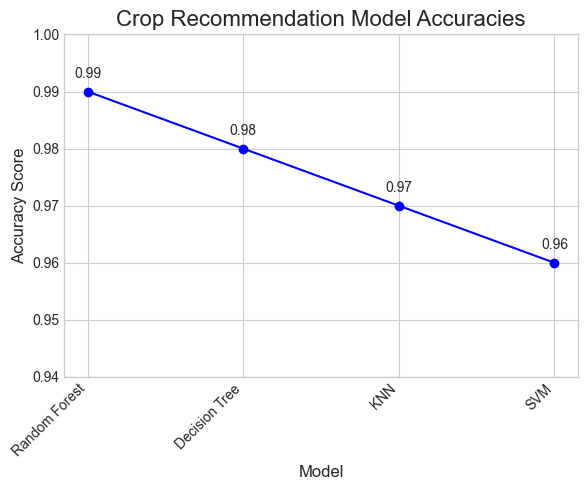

In [71]:
import matplotlib.pyplot as plt
import numpy as np
models = {
    'Random Forest': 0.99,
    'Decision Tree': 0.98,
    'KNN': 0.97,
    'SVM': 0.96
}

model_names = list(models.keys())
accuracy_scores = list(models.values())

# Create the line chart
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(6, 5))

ax.plot(model_names, accuracy_scores, marker='o', linestyle='-', color='b', label='Accuracy')

# Adding titles and labels
ax.set_title('Crop Recommendation Model Accuracies', fontsize=16)
ax.set_xlabel('Model', fontsize=12)
ax.set_ylabel('Accuracy Score', fontsize=12)
ax.set_ylim(0.94, 1.00) # Setting a tight y-axis for better visualization
plt.xticks(rotation=45, ha="right")

# Adding data labels to each point
for i, txt in enumerate(accuracy_scores):
    ax.annotate(f'{txt:.2f}', (model_names[i], accuracy_scores[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()

In [72]:
# Rerun this cell at the end of your notebook
import pickle

# --- Save the NEW Random Forest model ---
with open('crop_model.pkl', 'wb') as file:
    pickle.dump(rf, file)

# --- Re-save the StandardScaler ---
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

print("New, correctly trained crop model and scaler saved!")

New, correctly trained crop model and scaler saved!
